In [30]:
import pandas as p
fr = p.read_csv(r'C:\Users\35389\Desktop\covid19-cdc-22203536.csv')

r, c  = fr.shape
print (  f"Number of rows:   { r }"  )
print (  f"Number of columns:   { c}"  )

Number of rows:   20000
Number of columns:   19


In [31]:
print("the First 5 rows  : ")

print(fr.head())


print("the final 5 rows  : ")
print(fr.tail())
     

the First 5 rows  : 
  case_month res_state  state_fips_code      res_county  county_fips_code  \
0    2020-08        FL             12.0      MIAMI-DADE           12086.0   
1    2020-11        CA              6.0          ORANGE            6059.0   
2    2021-01        NC             37.0        GUILFORD           37081.0   
3    2021-08        CA              6.0  SAN BERNARDINO            6071.0   
4    2020-04        FL             12.0      PALM BEACH           12099.0   

   age_group     sex   race            ethnicity  \
0  65+ years    Male  White      Hispanic/Latino   
1  65+ years    Male  Asian  Non-Hispanic/Latino   
2  65+ years    Male  White  Non-Hispanic/Latino   
3  65+ years  Female  White      Hispanic/Latino   
4  65+ years  Female  White  Non-Hispanic/Latino   

   case_positive_specimen_interval  case_onset_interval  process exposure_yn  \
0                              NaN                  NaN  Missing     Missing   
1                              NaN         

In [32]:
# first we will check the columns 
print(fr.columns)

Index(['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code', 'age_group', 'sex', 'race', 'ethnicity',
       'case_positive_specimen_interval', 'case_onset_interval', 'process',
       'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn',
       'death_yn', 'underlying_conditions_yn'],
      dtype='object')


In [33]:
# lets convert all the relevant features into categorical 

for i in ['case_month', 'res_state', 'state_fips_code', 'res_county',
       'county_fips_code',  'sex', 'race', 'ethnicity', 'process', 'age_group',
       'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn',
       'death_yn', 'underlying_conditions_yn'] :

       fr[i] = p.Categorical(fr[i])

# now to convert the other features into float 
fr['case_positive_specimen_interval']  =  fr['case_positive_specimen_interval'].astype(float)
fr['case_onset_interval']  =  fr['case_onset_interval'].astype(float)




In [34]:
# lets check if those features got converted to the relevant datatypes 
print(fr.dtypes)
    

case_month                         category
res_state                          category
state_fips_code                    category
res_county                         category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object


In [35]:
# i am dropping the columns res_state and the column res_county since we already have fips codes for both of these!
fr.drop('res_state', axis=1, inplace=True)

fr.drop('res_county', axis=1, inplace=True)




# I will now print the new list of features.
print(fr.dtypes)


case_month                         category
state_fips_code                    category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object


In [36]:
#I will now look for constant columns 
constantcolumns = [i for i in fr.columns if fr[i].nunique==1]
# I will now print constant columns
print(constantcolumns)

[]


there werent any constant columns

I will now delete all duplicate rows. Duplicate rows do not provide any useful information for our model and are a waste of space 



In [37]:
fr.drop_duplicates( inplace=True )

r, c  = fr.shape
print (  f"Number of rows:   { r }"  )
print (  f"Number of columns:   { c}"  )

Number of rows:   18865
Number of columns:   17


In [38]:
##### I am going to look at the unqiue values a feature can take and see 
#### if the options indicate valid choices.


columns = fr.columns.tolist()

for i in columns:
    print(i ,fr[i].unique())


case_month ['2020-08', '2020-11', '2021-01', '2021-08', '2020-04', ..., '2022-04', '2020-02', '2022-03', '2020-01', '2022-11']
Length: 35
Categories (35, object): ['2020-01', '2020-02', '2020-03', '2020-04', ..., '2022-08', '2022-09', '2022-10', '2022-11']
state_fips_code [12.0, 6.0, 37.0, 25.0, 20.0, ..., 13.0, 50.0, 2.0, 78.0, 66.0]
Length: 49
Categories (49, float64): [1.0, 2.0, 4.0, 5.0, ..., 56.0, 66.0, 72.0, 78.0]
county_fips_code [12086.0, 6059.0, 37081.0, 6071.0, 12099.0, ..., 1117.0, 51047.0, 9013.0, 8015.0, 51600.0]
Length: 1201
Categories (1200, float64): [1003.0, 1009.0, 1015.0, 1017.0, ..., 56021.0, 56025.0, 56029.0, 56037.0]
age_group ['65+ years', '50 to 64 years', 'Missing', '18 to 49 years', NaN, '0 - 17 years']
Categories (5, object): ['0 - 17 years', '18 to 49 years', '50 to 64 years', '65+ years', 'Missing']
sex ['Male', 'Female', 'Unknown', NaN, 'Missing']
Categories (4, object): ['Female', 'Male', 'Missing', 'Unknown']
race ['White', 'Asian', 'Black', NaN, 'Missin

C:\Users\35389\AppData\Local\Temp\ipykernel_11004\1722133833.py:8: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  print(i ,fr[i].unique())


In [39]:
#### as you can see many of the features have values that take the value Missing 
### which we are going to replace with NaN

fr['sex'].replace('Missing',  float('nan'),  inplace=True)
fr['age_group'].replace('Missing',  float('nan'),  inplace=True)
fr['race'].replace('Missing',  float('nan'),  inplace=True)
fr['ethnicity'].replace('Missing',  float('nan'),  inplace=True)
fr['process'].replace('Missing',  float('nan'),  inplace=True)
fr['exposure_yn'].replace('Missing',  float('nan'),  inplace=True)
fr['symptom_status'].replace('Missing',  float('nan'),  inplace=True)
fr['hosp_yn'].replace('Missing',  float('nan'),  inplace=True)
fr['icu_yn'].replace('Missing',  float('nan'),  inplace=True)

print(fr['sex'].value_counts())

Female     9616
Male       8754
Unknown      71
Name: sex, dtype: int64


In [40]:
# I will now save the updated dataframe to a new csv file 



fr.to_csv(r'C:\Users\35389\Desktop\clean22203536.csv', index=False)


In [41]:
# I will now start reading from the updated csv file.

fr = p.read_csv(r'C:\Users\35389\Desktop\clean22203536.csv')
print(fr.dtypes)

case_month                          object
state_fips_code                    float64
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
case_onset_interval                float64
process                             object
exposure_yn                         object
current_status                      object
symptom_status                      object
hosp_yn                             object
icu_yn                              object
death_yn                            object
underlying_conditions_yn            object
dtype: object


In [42]:
# notice how all the features end up getting messed up since we started reading
# from the new file 

# I will reinstate the types 





# lets convert all the relevant features into categorical 

for i in ['case_month',  'state_fips_code',
       'county_fips_code',  'sex', 'race', 'ethnicity', 'process', 'age_group',
       'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn', 'icu_yn',
       'death_yn', 'underlying_conditions_yn'] :

       fr[i] = p.Categorical(fr[i])

# now to convert the other features into float 
fr['case_positive_specimen_interval']  =  fr['case_positive_specimen_interval'].astype(float)
fr['case_onset_interval']  =  fr['case_onset_interval'].astype(float)


print(fr.dtypes)

case_month                         category
state_fips_code                    category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
case_onset_interval                 float64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object


In [43]:
# I will now make descriptive statistics for all numerical features 

continuousfr = fr[[ 'case_positive_specimen_interval' ,  'case_onset_interval']]


stats = p.DataFrame({
     "Feature": ["case_positive_specimen_interval", "case_onset_interval"],
    # calculate the count of the non missing values 
       "Count": continuousfr.count(),
    # calculate the missing percentage 
    "Missing percentage": continuousfr.isnull().mean() *  (100) ,
    # calculate the cardinality !
         "Cardinality": continuousfr.nunique() ,
    # calculate the lowest value 
        "Minimum": continuousfr.min() ,
    # calculate the 1st quartile value i.e the 25%
       "1st quart": continuousfr.quantile(0.25) ,
    #calculate the mean median 3rd quart maximum value and standard devation of the continuous stats.
       "Mean": continuousfr.mean() ,
      "Median": continuousfr.median() ,
    "3rd quart": continuousfr.quantile(0.75) ,
    "Max": continuousfr.max() ,
    "Standard Deviation": continuousfr.std()
 })


stats.to_csv( "continuous22203536.csv",  index = False)

In [44]:
# I will now make stats for all the categorical features 

# next we define which features are categorical 
cfeatures= ['case_month' , 'state_fips_code' , 'county_fips_code' , 'age_group' , 'sex' , 'race' , 'ethnicity', 'process', 
                'exposure_yn', 'current_status', 'symptom_status', 'hosp_yn' , 'icu_yn', 'death_yn', 'underlying_conditions_yn']
# then we will calculate all the relevant stats we want.


# make a dictionary thats empty to add stuff later.
results = {}

for i in cfeatures: 
    count =   fr[i].count()
    missingpercentage =   fr[i].isnull().mean() * 100
    cardinality =  len(fr[i].unique())
    mode =  fr[i].mode().values[0]
    modefrequency =  fr[i].value_counts().max()
    modepercentage =  modefrequency / count * 100
    secondmode = fr[i].value_counts().index[1]
    secondmodefrequency =  fr[i].value_counts().iloc[1]
    secondmodepercentage = secondmodefrequency / count * 100
    
    #finally we will store the values in a dictionary
    results[i] = {
    
    'count' :  count ,
    'missing%' :  missingpercentage ,
    'cardinality' :  cardinality ,
    'mode' :  mode ,
    
    'modefreq' :  modefrequency ,
    'mode%' :  modepercentage ,
    'secondmode' :  secondmode ,
    'secondmodefreq' :  secondmodefrequency ,
    'secondmode%' :  secondmodepercentage ,  }

    
# finally we are going to put the end product into a brand new csv file.
x = p.DataFrame.from_dict(results, orient='index')
x.to_csv('categorical22203536.csv')
 





next I will make the histograms.

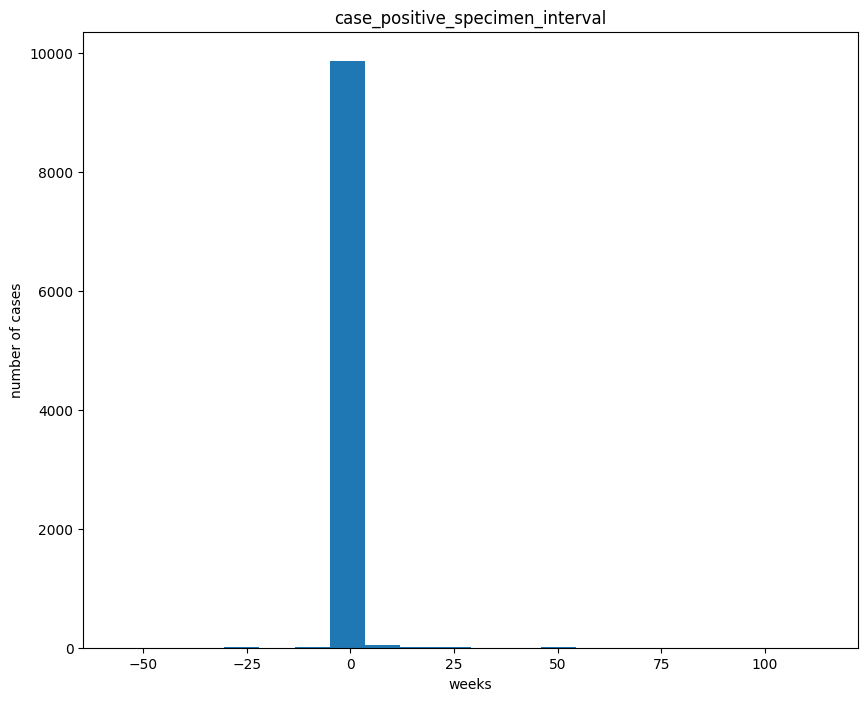

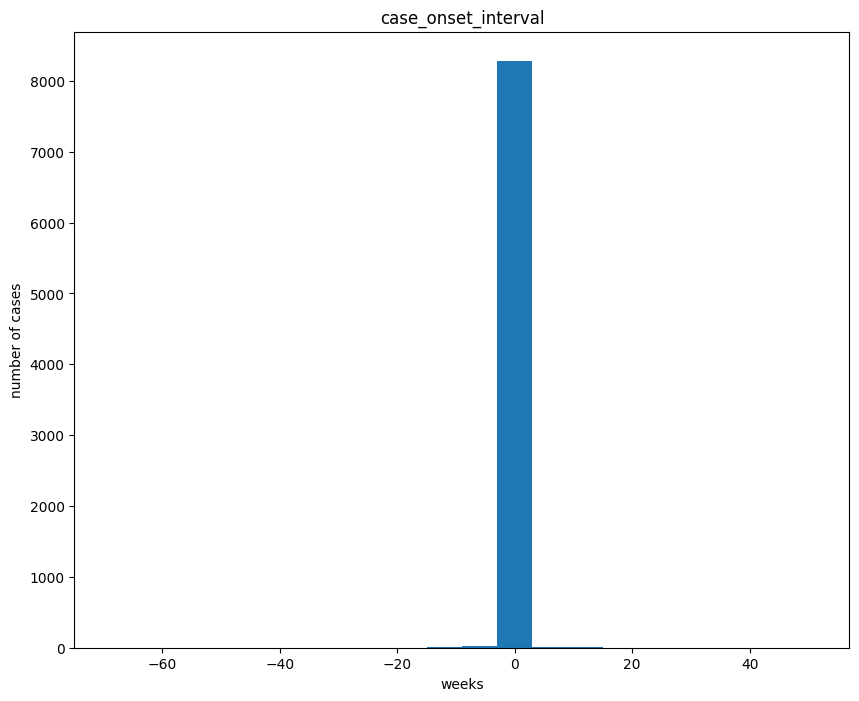

In [45]:


import matplotlib.pyplot as matt


# pick the columns that are continuous 
x  = fr.select_dtypes(include =   ['float64'])


# plot the relevant histograms
for j in x:
    matt.figure(figsize=(10,8))
    matt.hist(fr[j], bins=20)
    matt.title(j)
    matt.xlabel('weeks')
    matt.ylabel('number of cases')
    matt.show()
    

# call the function 
matt.show()

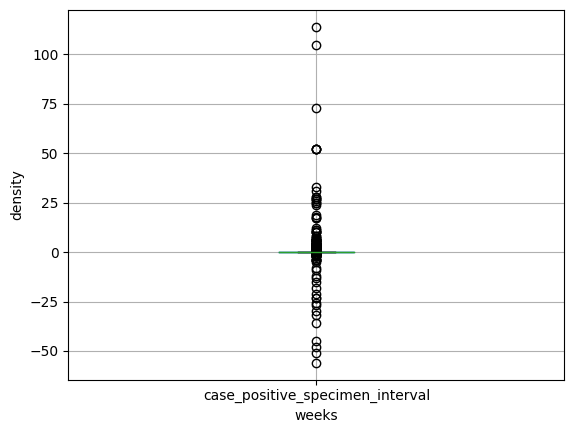

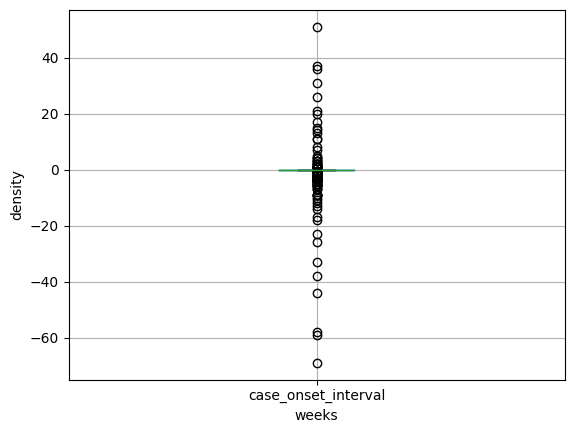

In [46]:
x = fr.select_dtypes(include=['float64']).columns.tolist()

# Plot the relevant boxplots for all the continuous features
for i in x:
    fr.boxplot(column=i)
    matt.xlabel('weeks')
    matt.ylabel('density')
    
    matt.show()
    

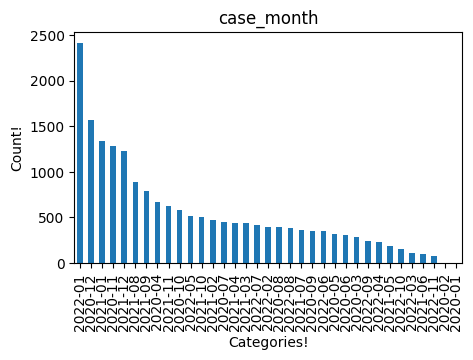

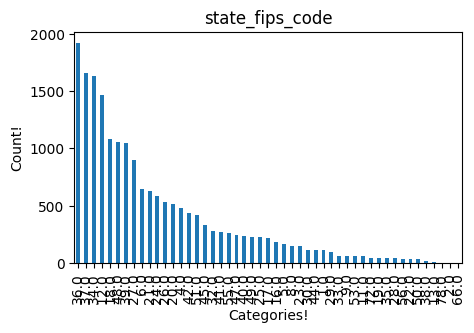

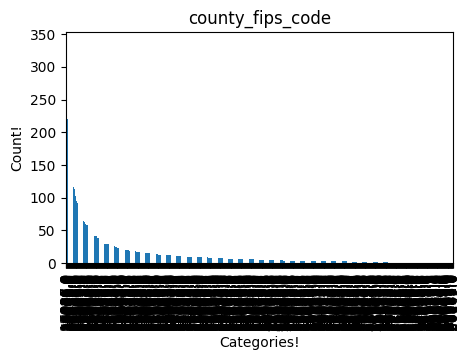

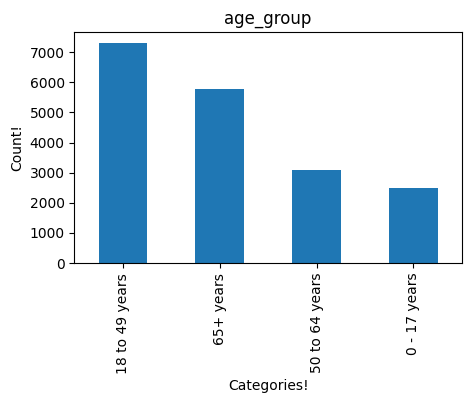

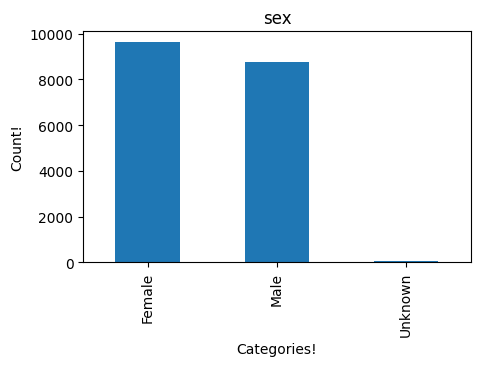

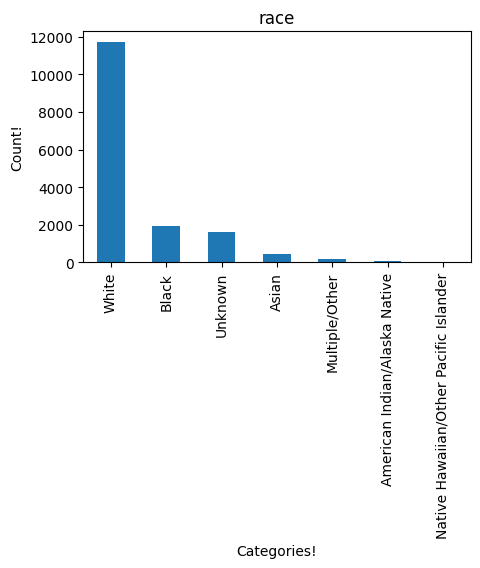

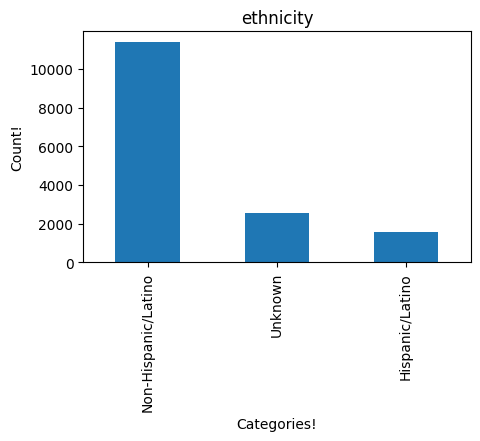

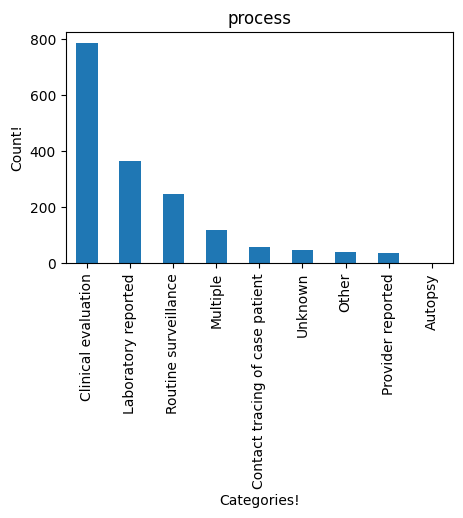

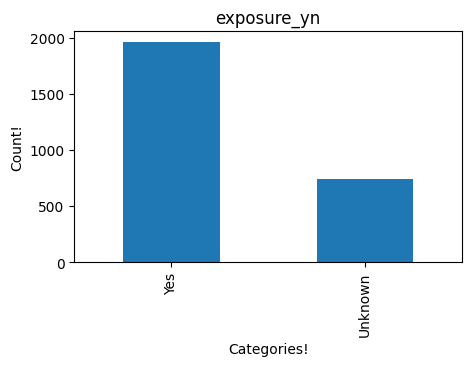

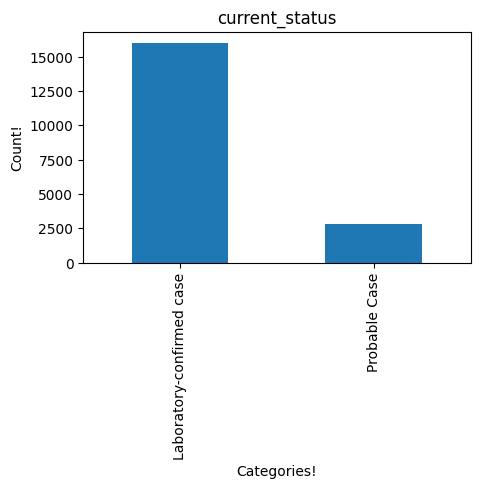

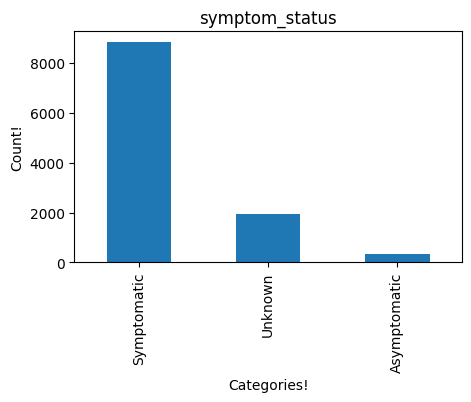

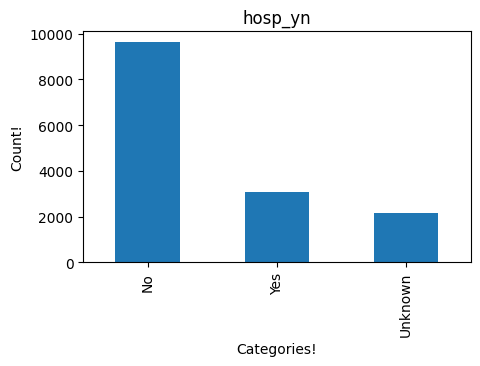

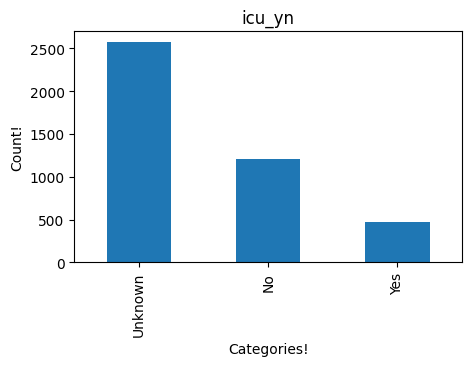

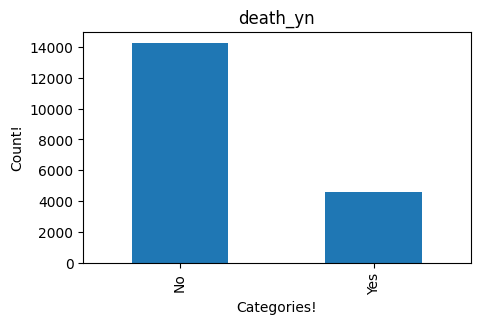

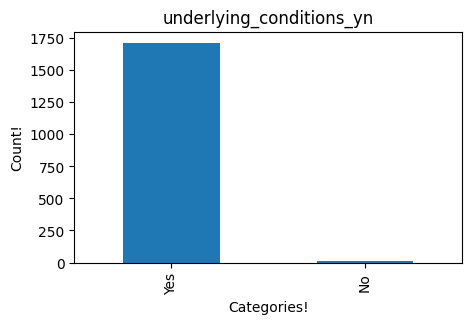

In [47]:
y = fr.select_dtypes(include='category').columns.tolist()

for j in y:
    matt.figure(figsize=(5,3))
    fr[j].value_counts().plot(kind= 'bar')
    matt.title(j)
    matt.xlabel('Categories!')
    matt.ylabel('Count!')
    matt.show()

In [48]:
fr = fr.drop('process',  axis=1)
fr = fr.drop('exposure_yn',  axis=1)
fr = fr.drop('icu_yn',  axis=1)
fr = fr.drop('underlying_conditions_yn',  axis=1)
fr = fr.drop('case_onset_interval',  axis=1)

print(fr.dtypes)


case_month                         category
state_fips_code                    category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
current_status                     category
symptom_status                     category
hosp_yn                            category
death_yn                           category
dtype: object


In [49]:
import numpy as np 


Mode = fr['county_fips_code'].mode().iloc[0]
fr['county_fips_code'] = fr['county_fips_code'].fillna(Mode)


Mode = fr['race'].mode().iloc[0]
fr['race'] = fr['race'].fillna(Mode)

Mode = fr['ethnicity'].mode().iloc[0]
fr['ethnicity'] = fr['ethnicity'].fillna(Mode)

Mode = fr['symptom_status'].mode().iloc[0]
fr['symptom_status'] = fr['symptom_status'].fillna(Mode)

Mode = fr['hosp_yn'].mode().iloc[0]
fr['hosp_yn'] = fr['hosp_yn'].fillna(Mode)



In [50]:
y= fr['county_fips_code'].isna().sum()
print(y)

0


In [51]:

#### first get rid of the negative values 
import numpy as np 


fr['case_positive_specimen_interval'] =   np.where(fr['case_positive_specimen_interval']  <  0, np.nan, fr['case_positive_specimen_interval'])





In [52]:
y= fr['case_positive_specimen_interval'].isna().sum()
print(y)

8989


In [53]:
### then replace the NaN values with the mean 


fr['case_positive_specimen_interval'] = fr['case_positive_specimen_interval'].fillna(fr['case_positive_specimen_interval'].mean())

In [54]:
y= fr['case_positive_specimen_interval'].isna().sum()
print(y)

0


In [55]:
fr.to_csv(r'C:\Users\35389\Desktop\ultraclean22203536.csv', index=False)

In [119]:
# I will now start reading from the new file 
import pandas as p 
fr = p.read_csv(r'C:\Users\35389\Desktop\ultraclean22203536.csv')
print(fr.dtypes)

case_month                          object
state_fips_code                    float64
county_fips_code                   float64
age_group                           object
sex                                 object
race                                object
ethnicity                           object
case_positive_specimen_interval    float64
current_status                      object
symptom_status                      object
hosp_yn                             object
death_yn                            object
dtype: object


In [120]:
# notice how all the features end up getting messed up since we started reading
# from the new file 

# I will reinstate the types 





# lets convert all the relevant features into categorical 

for i in ['case_month',  'state_fips_code',
       'county_fips_code',  'sex', 'race', 'ethnicity',  'age_group',
        'current_status', 'symptom_status', 'hosp_yn',
       'death_yn'] :

       fr[i] = p.Categorical(fr[i])

# now to convert the other features into float 
fr['case_positive_specimen_interval']  =  fr['case_positive_specimen_interval'].astype(float)


print(fr.dtypes)

case_month                         category
state_fips_code                    category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
current_status                     category
symptom_status                     category
hosp_yn                            category
death_yn                           category
dtype: object


QUESTION 3

 In order to find out which feature pairs of interest I am going to investigate which feature pairs are highly correlated with death less the feature pairs that are highly correlated with each other. In order to do this I will use cramers V test

In [121]:
import pandas as pd
from scipy.stats import chi2_contingency

import numpy as numpy



# List the categorical features
cathy = ['case_month',      'state_fips_code',
       'county_fips_code',  'sex',  'race',  'ethnicity',  'age_group',
        'current_status', 'symptom_status',  'hosp_yn',
         'death_yn']

# iterate over the categorical features using for loop
for c in cathy:
    
    
     # make a contingency table called x 
    x = pd.crosstab(fr['death_yn'],    fr[c])

      # calculate p value and chi squared.
    chi2 , p_val , dof , expected =     chi2_contingency(x)

      # get cramers V
    n = x.sum().sum()
    p2 = chi2/n
    r, k = x.shape
    p2 = max(0, p2 - ((k - 1)* (r - 1))/(n -1))
    rc = r - ((r- 1)**2)/(n - 1)
    kc = k - ((k- 1)** 2)/(n - 1)
    V = numpy.sqrt(p2 / min( (kc - 1) , (rc - 1)))

      # finally Print out the results
    print("the cramers v for {0} and death_yn is : {1:.2f}".format(c, V))

            
            
        
            

the cramers v for case_month and death_yn is : 0.37
the cramers v for state_fips_code and death_yn is : 0.54
the cramers v for county_fips_code and death_yn is : 0.60
the cramers v for sex and death_yn is : 0.08
the cramers v for race and death_yn is : 0.11
the cramers v for ethnicity and death_yn is : 0.12
the cramers v for age_group and death_yn is : 0.71
the cramers v for current_status and death_yn is : 0.08
the cramers v for symptom_status and death_yn is : 0.09
the cramers v for hosp_yn and death_yn is : 0.62
the cramers v for death_yn and death_yn is : 1.00


a value above 0.4 indicates a relatively strong association between the features so the following features are associated with death_yn strongly.

references 
https://www.statstest.com/cramers-v-2/
https://www.statology.org/interpret-cramers-v/

state_fips_code
county_fips_code
age_group
hosp_yn


next I will check which of these features are correlated with each other.


In [130]:

import pandas as pd
import numpy as numpy
from scipy.stats import chi2_contingency

# list the categorical features.
c = [ 'state_fips_code', 'county_fips_code', 'age_group', 'hosp_yn', 'death_yn']

# iterate over the features using a for loop.
for i, feature1 in enumerate(c):
    for j, feature2 in enumerate(c):
        if i < j:
            # make a contingency table 
            x =  pd.crosstab(fr[feature1], fr[feature2])

            # get the p value and chi squared 
            chi2,  p_val,  dof,  expected = chi2_contingency(x)

            # Calculate the Cramer's V
            n = x.sum().sum()
            p2 = chi2/n
            r, k = x.shape
            p2c   = max(0, p2 - ((k-1)*(r-1))/(n-1))
            rc  = r - ((r-1)**2)/(n-1)
            kc  = k - ((k-1)**2)/(n-1)
            V = numpy.sqrt(p2c  / min((kc -1), (rc  -1)))

            # Print out the results
            print("the cramers v for  {0} and {1}: {2:.2f}".format(feature1, feature2, V))
    

the cramers v for  state_fips_code and county_fips_code: 0.88
the cramers v for  state_fips_code and age_group: 0.23
the cramers v for  state_fips_code and hosp_yn: 0.51
the cramers v for  state_fips_code and death_yn: 0.54
the cramers v for  county_fips_code and age_group: 0.25
the cramers v for  county_fips_code and hosp_yn: 0.55
the cramers v for  county_fips_code and death_yn: 0.60
the cramers v for  age_group and hosp_yn: 0.34
the cramers v for  age_group and death_yn: 0.71
the cramers v for  hosp_yn and death_yn: 0.62


a cramers value under 0.2 indicates a weak assocation and less than 0.4 indicates a moderate association 


references 
https://www.statstest.com/cramers-v-2/
https://www.statology.org/interpret-cramers-v/



I want the features where is a weak assocation between them AND
strong association with death 

since no feature pairs here are weakly correlated I will choose those only moderately correlated. Those are 

state_fips_code and age_group: 0.23
county_fips_code and age_group: 0.25
age_group and hosp_yn: 0.34


I will now investigate how well correlated 
case_positive_specimen_interval is with death_yn and with other features.

In [132]:
import pandas as pd

import numpy as np

from scipy.stats import pearsonr

from sklearn.preprocessing import LabelEncoder


# Define the list of categorical variables
cv = ['state_fips_code',  'county_fips_code',  'age_group', 'hosp_yn', 'death_yn']

# use encoder on the categorical variables 
l = LabelEncoder()
for i in cv:
    fr[i] =    l.fit_transform(fr[i])

# Calculate the matrix 
matrix  = fr.corr()

#get correlations between the variables 
values = matrix['case_positive_specimen_interval'][cv]

# Print the end result 
print(values)



state_fips_code     0.000650
county_fips_code    0.001789
age_group           0.025868
hosp_yn             0.008635
death_yn            0.003911
Name: case_positive_specimen_interval, dtype: float64


C:\Users\35389\AppData\Local\Temp\ipykernel_11004\3417751858.py:19: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrix  = fr.corr()


as the correlation between death_yn and case_specimen_onset_interval is weak i.e less than 0.1 (see reference below) I will not investigate it further. I am only interested in features correlated with death_yn

reference https://support.minitab.com/en-us/minitab/20/help-and-how-to/statistics/basic-statistics/how-to/correlation/interpret-the-results/all-statistics-and-graphs/

so in conclusion the feature pairs of interest are

state_fips_code and age_group and death_yn
county_fips_code and age_group and death_yn
age_group and hosp_yn and death_yn


so now I will plot the correlation plots between these feature pairs. 

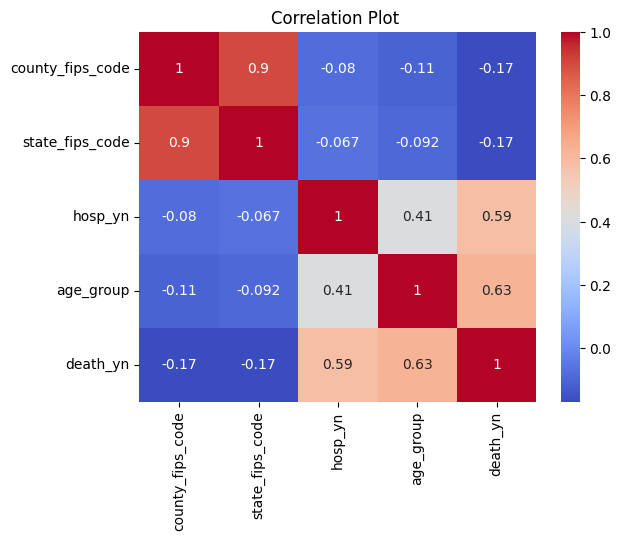

In [133]:
import pandas as pd
import seaborn as sea
import matplotlib.pyplot as matt

# list the cat variables 
cvariables  = ['county_fips_code',  'state_fips_code',  'hosp_yn',  'age_group', 'death_yn']



# Encode the categorical variables
l = LabelEncoder()
for j in cvariables:
    fr[j] = l.fit_transform(fr[j])

# get the matrix
matrix = fr[cvariables].corr()

# crate the heatmap
sea.heatmap(matrix,   annot=True,  cmap='coolwarm')
matt.title('Correlation Plot ')
matt.show()

the correlation graph shows a high correlation between 
cases that were hospitalised and the probability of death 
it also shows a high correlation between age_group and death. But since the correlation between age_group and hosp_yn is not strong we cannot say that the correlation between age_group hosp_yn and death_yn is strong.

No other significant postive correlations are noticed with death from the plot.

In [ ]:
question 4

the factors that correlate with covid mortality according to 
are age sex comorbidities and socioeconomic status. See Reference below. 

https://pubmed.ncbi.nlm.nih.gov/32640463/

I have already removed comorbidities from the dataset due to poor data quality. I will use county_fip_code as a proxy for socioeconomnic status. I then consider that based on my own analysis of my data that the following 4 factors were highly correlated with death.

state_fips_code
county_fips_code
age_group
hosp_yn

state and county are related to socioeconomic status according to 
https://www.ers.usda.gov/data-products/county-level-data-sets

I suspect that due to certain states and counties having outbreaks in certain parts of the pandemic that case_month and county_fips_code could be combined to be a more informative feature.


new features are as follows.

age_hosp
hosp_countyfips
casemonth_countyfips




In [139]:
# ok so we are going to add a new column to the dataframe called age_hosp
fr['age_hosp'] =  fr['age_group'].astype(str).str.cat(fr['hosp_yn'].astype(str),  sep='_')

# we are going to frint out the columns again to check 
print(fr.columns)


Index(['case_month', 'state_fips_code', 'county_fips_code', 'age_group', 'sex',
       'race', 'ethnicity', 'case_positive_specimen_interval',
       'current_status', 'symptom_status', 'hosp_yn', 'death_yn',
       'hosp_countyfips', 'casemonth_countyfips', 'age_hosp'],
      dtype='object')


In [140]:
# we are going to to do the same thing for the other 2 new features 
fr['hosp_countyfips'] =  fr['hosp_yn'].astype(str).str.cat(fr['county_fips_code'].astype(str),  sep='_')
fr['casemonth_countyfips'] =  fr['case_month'].astype(str).str.cat(fr['county_fips_code'].astype(str),  sep='_')

# we are going to print out the columns to check 
print(fr.columns)

Index(['case_month', 'state_fips_code', 'county_fips_code', 'age_group', 'sex',
       'race', 'ethnicity', 'case_positive_specimen_interval',
       'current_status', 'symptom_status', 'hosp_yn', 'death_yn',
       'hosp_countyfips', 'casemonth_countyfips', 'age_hosp'],
      dtype='object')


lets change the 3 new features into the categorical datatype.

In [144]:
cvariables  = ['county_fips_code',  'state_fips_code',  'hosp_yn',  'age_group', 'death_yn']
for i in cvariables:
    fr[i] =    fr[i].astype('category')



fr['age_hosp'] =    fr['age_hosp'].astype('category')

fr['hosp_countyfips'] =   fr['hosp_countyfips'].astype('category')

fr['casemonth_countyfips'] =   fr['casemonth_countyfips'].astype('category')
# print out the datatypes to check 
fr.dtypes

case_month                         category
state_fips_code                    category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval     float64
current_status                     category
symptom_status                     category
hosp_yn                            category
death_yn                           category
hosp_countyfips                    category
casemonth_countyfips               category
age_hosp                           category
dtype: object

In [146]:
import pandas as pd
import numpy as numpy
from scipy.stats import chi2_contingency

# List of categorical features
cat  = ['age_hosp', 'hosp_countyfips', 'casemonth_countyfips', 'case_month' ]

# Iterate over each categorical feature and calculate Cramer's V with 'death_yn'
for c in cat:
    # make a contingency table 
            x =  pd.crosstab(fr['death_yn'], fr[c])

            # get the p value and chi squared 
            chi2,  p_val,  dof,  expected = chi2_contingency(x)

            # Calculate the Cramer's V
            n = x.sum().sum()
            p2 = chi2/n
            r, k = x.shape
            p2c   = max(0, p2 - ((k-1)*(r-1))/(n-1))
            rc  = r - ((r-1)**2)/(n-1)
            kc  = k - ((k-1)**2)/(n-1)
            V = numpy.sqrt(p2c  / min((kc -1), (rc  -1)))

    # Print the results
            print("the Cramer's V for {0} and death_yn: {1:.2f}".format(c, V))
    
    
           

         

            


the Cramer's V for age_hosp and death_yn: 0.79
the Cramer's V for hosp_countyfips and death_yn: 0.74
the Cramer's V for casemonth_countyfips and death_yn: 0.49
the Cramer's V for case_month and death_yn: 0.37


comparing new and old features.


Cramer's V for age_hosp and death_yn: 0.79
Cramer's V for hosp_countyfips and death_yn: 0.74
Cramer's V for casemonth_countyfips and death_yn: 0.49


Cramer's V for age_group and death_yn: 0.71
Cramer's V for hosp_yn and death_yn: 0.62
Cramer's V for case_month and death_yn: 0.37



notice that the new features have higher assocations with death than the old features did because the cramer V is higher. age_hosp correlates better with death because I suspect that hospitalisation has a large affect on death rates at higher age groups.

hosp_county_fips has higher predictive value than hosp_yn alone because the location of the hospital matters for survival rates. This could be due to my earlier analysis of how socioeconomic status can play an effect and how location can act as a proxy for socioeconomic status.

Casemonth_countyfips has a much better correlation with death 
than case_month alone because of the fact that during the pandemic there were outbreaks in different US locations at different times so I expected this to show itself in the new feature by having a higher predictive power.


In [117]:
# I will save to new dataframe to a new file 

fr.to_csv(r'C:\Users\35389\Desktop\finalultraclean22203536.csv', index=False)